# Introduction: Defining the problem

I am doing this project to analyze ranked League of Legends matches - I am using data from over 50000 ranked matched in Season 9 from the EU region. Which objectives should be focused at which stage of the game?

First let us define this problem;
It is a classification problem where our target will be the 'winner' feature of the data set. We will be trying to see which
features contribute to the victory of team1 or team2

# Part 1a: Reading in and Cleaning data

In [1]:
import pandas as pd
import numpy as np
#importing Libraries

In [2]:
df = pd.read_csv("E:/NotesAssignments/Unit-2/DS-Unit-2-Applied-Modeling/data/project-data/LoL-Ranked-Data.csv")
df1b = pd.read_csv("E:/NotesAssignments/Unit-2/DS-Unit-2-Applied-Modeling/data/project-data/LoL-Ranked-Data.csv")
df2 = pd.read_csv("E:/NotesAssignments/Unit-2/DS-Unit-2-Applied-Modeling/data/project-data/LoL-Ranked-Data.csv")
df3 = pd.read_csv("E:/NotesAssignments/Unit-2/DS-Unit-2-Applied-Modeling/data/project-data/LoL-Ranked-Data.csv")
#Reading in the data as dataframe df, also using df1b for testing in a later section

In [3]:
rows1 = df.shape[0] #Saving the number of rows for later
df
#Viewing the data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In looking at the data, I can see already that there are columns that are irrelevant to what I am trying to prove.
I want to specifically look at objectives that players can take in a given game, and will be removing all other features.

I will make the gameId (a unique identifier for each game) the index.\
I will remove creationTime (a code for when the game session was created), because it is irrelevant.\
I will keep gameDuration in case there is a correlation with the length of the game and a certain teams' victory.\
I will remove seasonId, since it is constant for all games.\
I will keep winner, it will be what I am trying to predict with my model, whether team1 wins or team2 wins.\
I will keep all the *first* objectives, as well as the total objectives captured by each team.\
I will remove all features which track the pick, bans, and summoner spells of each team, I want to analyze objectives, not champion picks or summoner spells.\
This leaves me with the following as my target and features:

In [4]:
df.set_index('gameId',inplace=True)
columns = ['gameDuration',
           'winner',
           'firstBlood',
           'firstTower',
           'firstInhibitor',
           'firstBaron',
           'firstDragon',
           'firstRiftHerald',
           't1_towerKills',
           't1_inhibitorKills',
           't1_baronKills',
           't1_dragonKills',
           't1_riftHeraldKills',
           't2_towerKills',
           't2_inhibitorKills',
           't2_baronKills',
           't2_dragonKills',
           't2_riftHeraldKills']
df = df[columns]
#Setting index, defining columns in dataframe

In [5]:
df
#checking to see changes persisted

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
gameId,,,,,,,,,,,,,,,,,,
3326086514,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
3229566029,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
3327363504,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3326856598,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
3330080762,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308904636,1944,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0
3215685759,3304,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1
3322765040,2156,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0


In [6]:
#putting data through profile inspector for Exploratory Data Analysis
from pandas_profiling import ProfileReport
profile = ProfileReport(df,minimal=True)


In [7]:
profile.to_file('PandasProfiling.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_notebook_iframe()

Notice a couple features have values of 0, this is okay, this just means that there are certain games where one team does not capture that specific objective.
There are however, 437 duplicate rows, we want to get rid of all of these rows, so that they do not skew the data.

In [9]:
df = df[~df.index.duplicated(keep='first')]
#This should make df with only unique values
rows2 = df.shape[0]

In [10]:
rows1 - rows2 == 437
#This should be equal to the amount of duplicate rows we've removed, if this is true we've removed duplicate rows

True

# Part 1b: Making additional features

I want to make additional features essentially telling me which team has captured more objectives
This function should take the same objective and subtract it from the other team's objective total, and if it is positive, Team1 secured more, if it is negative Team2 secured more, if it is 0, the neither team secured more

In [11]:
df.loc[df['t1_towerKills'] < df['t2_towerKills'], 'mostTowerKills'] = 2
df.loc[df['t1_towerKills'] > df['t2_towerKills'], 'mostTowerKills'] = 1
df.loc[df['t1_towerKills'] == df['t2_towerKills'], 'mostTowerKills'] = 0
#making a new feature based on other features

E:\LambdaStuff\envs\unit2\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
E:\LambdaStuff\envs\unit2\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
E:\LambdaStuff\envs\unit2\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [12]:
df
#seeing if changes persisted

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,mostTowerKills
gameId,,,,,,,,,,,,,,,,,,,
3326086514,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1,1.0
3229566029,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0,1.0
3327363504,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0,1.0
3326856598,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0,1.0
3330080762,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308904636,1944,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0,2.0
3215685759,3304,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1,2.0
3322765040,2156,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0,2.0


This is able to identify which team got most of that specific objective I can use this in the function i write in the next section

# Part 1c: Making a function to wrangle, clean, and add features

In [13]:
def WRANGLE(x):
    x = x.copy()
    x.set_index('gameId',inplace=True)
    #Setting the index to gameId
    
    columns = ['gameDuration',
           'winner',
           'firstBlood',
           'firstTower',
           'firstInhibitor',
           'firstBaron',
           'firstDragon',
           'firstRiftHerald',
           't1_towerKills',
           't1_inhibitorKills',
           't1_baronKills',
           't1_dragonKills',
           't1_riftHeraldKills',
           't2_towerKills',
           't2_inhibitorKills',
           't2_baronKills',
           't2_dragonKills',
           't2_riftHeraldKills']
    
    x = x[columns]
    #Including only the features I want to include
    
    x = x[~x.index.duplicated(keep='first')]
    #Remove any duplicate rows, keeping only first occurences
    
    a = 't1_towerKills'
    b = 't2_towerKills'
    c = 'mostTowerKills'
    x.loc[x[a] < x[b], c] = 2
    x.loc[x[a] > x[b], c] = 1
    x.loc[x[a] == x[b], c] = 0
    
    a = 't1_inhibitorKills'
    b = 't2_inhibitorKills'
    c = 'mostInhibitorKills'
    x.loc[x[a] < x[b], c] = 2
    x.loc[x[a] > x[b], c] = 1
    x.loc[x[a] == x[b], c] = 0
    
    a = 't1_baronKills'
    b = 't2_baronKills'
    c = 'mostBaronKills'
    x.loc[x[a] < x[b], c] = 2
    x.loc[x[a] > x[b], c] = 1
    x.loc[x[a] == x[b], c] = 0
    
    a = 't1_dragonKills'
    b = 't2_dragonKills'
    c = 'mostDragonKills'
    x.loc[x[a] < x[b], c] = 2
    x.loc[x[a] > x[b], c] = 1
    x.loc[x[a] == x[b], c] = 0
    
    a = 't1_riftHeraldKills'
    b = 't2_riftHeraldKills'
    c = 'mostRiftHeraldKills'
    x.loc[x[a] < x[b], c] = 2
    x.loc[x[a] > x[b], c] = 1
    x.loc[x[a] == x[b], c] = 0
    #makes multiple features based on previous features
    
    return x

In [14]:
#making sure function works
df1b = WRANGLE(df1b)
#We want this function so that it can apply to any other data of similar structure, 
#should we want to analyze data from a different time period

In [15]:
df1b

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,mostTowerKills,mostInhibitorKills,mostBaronKills,mostDragonKills,mostRiftHeraldKills
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,1949,1,2,1,1,1,1,2,11,1,...,5,0,0,1,1,1.0,1.0,1.0,1.0,2.0
3229566029,1851,1,1,1,1,0,1,1,10,4,...,2,0,0,0,0,1.0,1.0,0.0,1.0,1.0
3327363504,1493,1,2,1,1,1,2,0,8,1,...,2,0,0,1,0,1.0,1.0,1.0,0.0,0.0
3326856598,1758,1,1,1,1,1,1,0,9,2,...,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0
3330080762,2094,1,2,1,1,1,1,0,9,2,...,3,0,0,1,0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308904636,1944,2,1,2,2,0,2,0,2,0,...,10,2,0,4,0,2.0,2.0,0.0,2.0,0.0
3215685759,3304,2,1,1,2,2,2,2,5,4,...,11,7,4,4,1,2.0,2.0,2.0,2.0,2.0
3322765040,2156,2,2,2,2,0,1,0,0,0,...,10,2,0,2,0,2.0,2.0,0.0,2.0,0.0


# Part 2a: Establishing Baseline

In [16]:
# Lets first define our target
target = 'winner'

In [17]:
df1b[target].value_counts(normalize=True)
#Checking the distribution of our target

1    0.506474
2    0.493526
Name: winner, dtype: float64

The target seems to be evenly distributed, which each class (1 and 2) accounting for being the victor of 50.6% and 49.4% of the results, respectively

Our 'baseline' would assume that team1 wins, every game, and will be correct 50.6% of the time.
This means our baseline accuracy will be 50.6%
We are able to use accuracy as our metric since our classes are evenly distributed.

# Part 2b: Splitting Data

In [18]:
target = 'winner'
features = df1b.columns.drop('winner')

In [19]:
from sklearn.model_selection import train_test_split
y = df1b[target]
X = df1b[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


# Part 3a: Linear Model; RidgeClassiferCV

In [20]:
from sklearn.linear_model import RidgeClassifierCV
import category_encoders as ce
from sklearn.pipeline import make_pipeline
#We do not need imputer since there are no missing values, and will not need scalers either

model_rccv = make_pipeline(
    ce.OrdinalEncoder(),
    RidgeClassifierCV()
)


In [21]:
model_rccv.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])))])

In [22]:
print('Training Accuracy:', model_rccv.score(X_train,y_train))
print('Testing Accuracy:', model_rccv.score(X_test,y_test))

Training Accuracy: 0.9566867440380001
Testing Accuracy: 0.9572030163549113


# Part 3b: Tree-Based Model; GradientBoosting & XGBoost

In [23]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = make_pipeline(
    ce.OrdinalEncoder(),
    GradientBoostingClassifier(random_state=42)
)
model_gbc.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [24]:
print('Training Accuracy:', model_gbc.score(X_train,y_train))
print('Testing Accuracy:', model_gbc.score(X_test,y_test))

Training Accuracy: 0.9724303413153127
Testing Accuracy: 0.9725785917148173


In [25]:
model_xgb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(random_state=42,n_jobs=-1)
)
model_xgb.fit(X_train,y_train)

[00:39:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\LambdaStuff\envs\unit2\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [26]:
print('Training Accuracy:', model_xgb.score(X_train,y_train))
print('Testing Accuracy:', model_xgb.score(X_test,y_test))

Training Accuracy: 0.987684246608883
Testing Accuracy: 0.9713054549015767


# Part 4: Feature Importances

## RidgeClassifierCV

In [27]:
importances_rccv = model_rccv.named_steps['ridgeclassifiercv'].coef_[0]
importances_rccv

array([-8.83984603e-05, -4.66466823e-03, -1.50811529e-01, -9.33067043e-02,
       -9.09469718e-02, -6.37092066e-02, -1.09088003e-02, -1.01447755e-01,
        2.15088125e-02, -9.64983641e-03, -4.66672773e-03,  2.58431948e-02,
        1.07184342e-01, -2.37243984e-02,  1.54358051e-01,  3.47899850e-02,
       -1.83759976e-02,  5.30804265e-01,  7.55769474e-02,  5.18593032e-02,
       -1.29636436e-02, -1.09088003e-02])

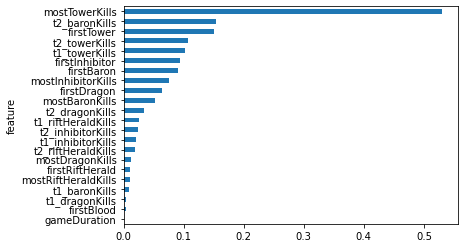

In [28]:
import matplotlib.pyplot as plt
model_importances_rccv = pd.Series(importances_rccv,index=X_train.columns).abs().sort_values(ascending=True)
model_importances_rccv.plot(kind='barh',xlabel='feature',ylabel='importance')
plt.savefig('RCCV Feautre Importances.png')
plt.show()

## GradientBoostingClassifier

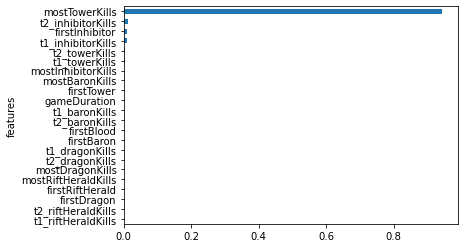

In [29]:
importances_gbc = model_gbc.named_steps['gradientboostingclassifier'].feature_importances_
model_importances_gbc = pd.Series(importances_gbc, index=X_train.columns).abs().sort_values(ascending=True)
model_importances_gbc.plot(kind='barh',xlabel='features',ylabel='importance')
plt.savefig('GBC Feature Importances.png')
plt.show()

## XGBoostingClassifier

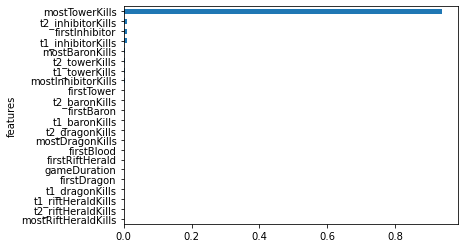

In [30]:
importances_xgb = model_xgb.named_steps['xgbclassifier'].feature_importances_
model_importances_xgb = pd.Series(importances_xgb, index=X_train.columns).abs().sort_values(ascending=True)
model_importances_xgb.plot(kind='barh',xlabel='features',ylabel='importance')
plt.savefig('XGBC Feature Importances.png')
plt.show()

# Part 5: Conclusion

Across *all* the models, it seems that the most important feature, across the board is mostTowerKills. This makes sense there are so many benefits that killing towers gives you. Things like map control, super minions, and more are all unlocked by killing towers. But this is sorta lame, if we remove this feature, what other features are important? Let's focus this time on a predictive model using only data from the first objectives in each category taken.

# Part 6: Run it back!

We will split off in the wrangle function, and instead make one that only includes which teams was the first to capture each objective, lets see how accurately we can predict who wins then.

## Wrangle Function

In [31]:
def WRANGLE2(x):
    x = x.copy()
    x.set_index('gameId',inplace=True)
    #Setting the index to gameId
    
    columns = ['gameDuration',
           'winner',
           'firstBlood',
           'firstTower',
           'firstInhibitor',
           'firstBaron',
           'firstDragon',
           'firstRiftHerald',]
    
    x = x[columns]
    #Including only the features I want to include
    
    x = x[~x.index.duplicated(keep='first')]
    #Remove any duplicate rows, keeping only first occurences
    
    return x
#this wrangle function only keeps the 'first' objectives

In [32]:
# we are using df2, the same as the original df, which has not been modified at all
df2 = WRANGLE2(df2)

## Splitting Data

In [33]:
target = 'winner'
features = df2.columns.drop('winner')

In [34]:
y = df2[target]
X = df2[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## GradientBoostingClassifier

In [35]:
#this time we will only use gradient boosting classifier to see importances
model_gbc2 = make_pipeline(
    ce.OrdinalEncoder(),
    GradientBoostingClassifier(random_state=42)
)
model_gbc2.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [36]:
print('Training Accuracy:', model_gbc2.score(X_train,y_train))
print('Testing Accuracy:', model_gbc2.score(X_test,y_test))

Training Accuracy: 0.9001518045149601
Testing Accuracy: 0.8972676525315836


We are still able to predict successfully the victor of the games about 90% of the time. Lets look at feature importances

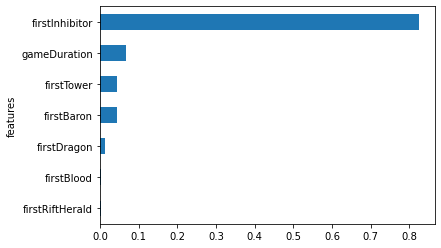

In [37]:
importances_gbc2 = model_gbc2.named_steps['gradientboostingclassifier'].feature_importances_
model_importances_gbc2 = pd.Series(importances_gbc2, index=X_train.columns).abs().sort_values(ascending=True)
model_importances_gbc2.plot(kind='barh',xlabel='features',ylabel='importance')
plt.savefig('GBC2 Feature Importances')
plt.show()

Looks like by far the most important thing, aside from getting as many towers as you can, is being the first team to break the base and destroy and inhibitor.\
This makes sense with what we've seen before, as destroying an inhibitor requires that you first destroy 3 towers in one lane first.\
Let's try this one more time without the inhibitor metric!

# Part 7: Run it back, again!

In [38]:
def WRANGLE3(x):
    x = x.copy()
    x.set_index('gameId',inplace=True)
    #Setting the index to gameId
    
    columns = ['gameDuration',
           'winner',
           'firstBlood',
           'firstTower',
           'firstBaron',
           'firstDragon',
           'firstRiftHerald',]
    
    x = x[columns]
    #Including only the features I want to include
    
    x = x[~x.index.duplicated(keep='first')]
    #Remove any duplicate rows, keeping only first occurences
    
    return x
#this wrangle function only keeps the 'first' objectives

In [39]:
df3 = WRANGLE3(df3)

In [40]:
target = 'winner'
features = df3.columns.drop('winner')
y = df3[target]
X = df3[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [41]:
model_gbc3 = make_pipeline(
    ce.OrdinalEncoder(),
    GradientBoostingClassifier(random_state=42)
)
model_gbc3.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [42]:
print('Training Accuracy:', model_gbc3.score(X_train,y_train))
print('Testing Accuracy:', model_gbc3.score(X_test,y_test))

Training Accuracy: 0.8120072474413594
Testing Accuracy: 0.8175497013025169


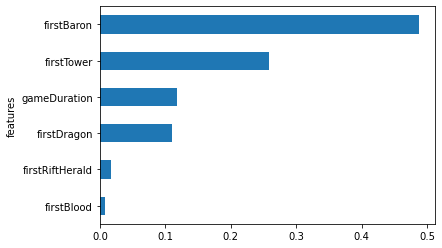

In [43]:
importances_gbc3 = model_gbc3.named_steps['gradientboostingclassifier'].feature_importances_
model_importances_gbc3 = pd.Series(importances_gbc3, index=X_train.columns).abs().sort_values(ascending=True)
model_importances_gbc3.plot(kind='barh',xlabel='features',ylabel='importance')
plt.savefig('GBC3 Feature Importances')
plt.show()